In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("social_media_engagement1.csv")
df.head()


,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [4]:
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (100, 9)

Data Types:
 post_id             int64
platform           object
post_type          object
post_time          object
likes               int64
comments            int64
shares              int64
post_day           object
sentiment_score    object
dtype: object

Missing Values:
 post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64


In [5]:
df.describe(include="all")


,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
count,100.000000,100,100,100,100.000000,100.00000,100.000000,100,100
unique,NaN,3,5,99,NaN,NaN,NaN,7,3
top,NaN,Instagram,carousel,5/2/2023 6:15,NaN,NaN,NaN,Wednesday,positive
freq,NaN,36,26,2,NaN,NaN,NaN,18,46
mean,50.500000,NaN,NaN,NaN,2381.810000,202.66000,415.650000,NaN,NaN
std,29.011492,NaN,NaN,NaN,1632.573284,138.84067,283.877601,NaN,NaN
min,1.000000,NaN,NaN,NaN,15.000000,10.00000,16.000000,NaN,NaN
25%,25.750000,NaN,NaN,NaN,895.750000,89.75000,183.000000,NaN,NaN
50%,50.500000,NaN,NaN,NaN,2220.000000,171.00000,356.500000,NaN,NaN
75%,75.250000,NaN,NaN,NaN,3593.250000,299.00000,689.500000,NaN,NaN


In [6]:
# Convert post_time column to datetime
df['post_time'] = pd.to_datetime(df['post_time'], errors='coerce')
df[['post_time']].head()


,post_time
0,2023-08-17 14:45:00
1,2023-05-14 00:45:00
2,2023-02-21 16:15:00
3,2023-11-16 00:45:00
4,2023-05-23 00:30:00


In [7]:
# Extract hour
df['hour'] = df['post_time'].dt.hour

# Define function to assign time of day
def get_time_of_day(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function
df['time_of_day'] = df['hour'].apply(get_time_of_day)

# Preview
df[['post_time', 'hour', 'time_of_day']].head()


,post_time,hour,time_of_day
0,2023-08-17 14:45:00,14,Afternoon
1,2023-05-14 00:45:00,0,Night
2,2023-02-21 16:15:00,16,Afternoon
3,2023-11-16 00:45:00,0,Night
4,2023-05-23 00:30:00,0,Night


In [8]:
# Add engagement score
df['engagement_score'] = df['likes'] + df['comments'] + df['shares']
df[['likes', 'comments', 'shares', 'engagement_score']].head()


,likes,comments,shares,engagement_score
0,2121,474,628,3223
1,3660,432,694,4786
2,4955,408,688,6051
3,1183,90,187,1460
4,3499,247,286,4032


In [9]:
# Optional: custom weighted virality index
df['virality_index'] = (df['likes'] * 0.3 + df['comments'] * 0.2 + df['shares'] * 0.5).round(2)
df[['engagement_score', 'virality_index']].head()


,engagement_score,virality_index
0,3223,1045.1
1,4786,1531.4
2,6051,1912.1
3,1460,466.4
4,4032,1242.1


C:\Users\rajlo\AppData\Local\Temp\ipykernel_19452\3807857569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='post_type', y='engagement_score', palette='Set2')


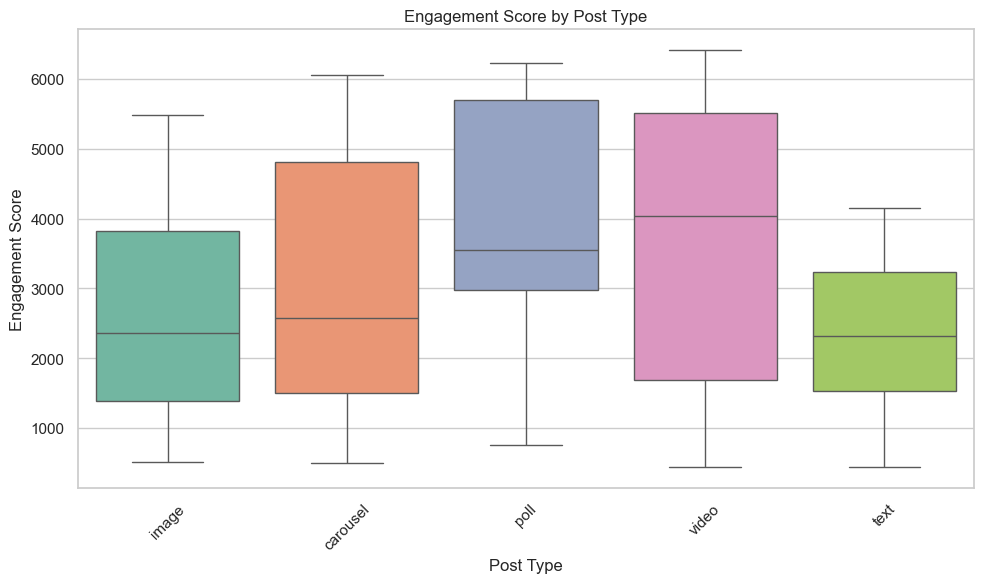

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='post_type', y='engagement_score', palette='Set2')
plt.title('Engagement Score by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\rajlo\AppData\Local\Temp\ipykernel_19452\2999704814.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='platform', y='virality_index', ci=None, estimator='mean', palette='Set1')
C:\Users\rajlo\AppData\Local\Temp\ipykernel_19452\2999704814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='platform', y='virality_index', ci=None, estimator='mean', palette='Set1')


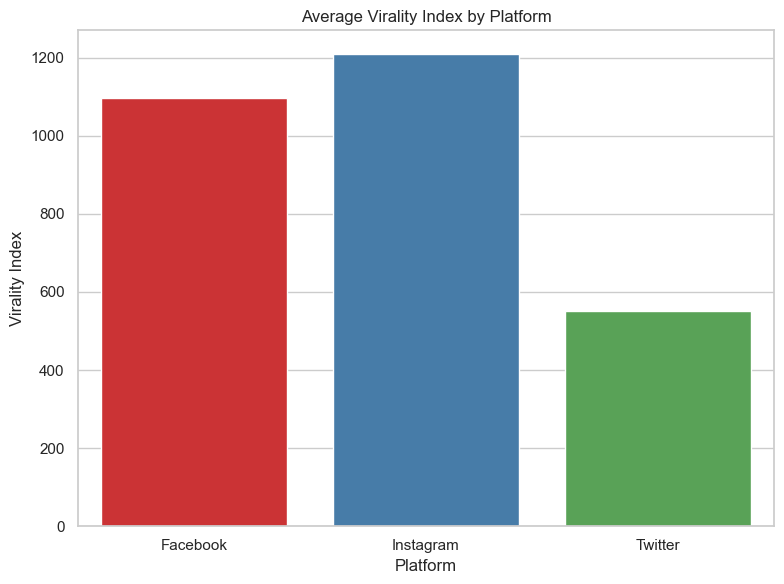

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='platform', y='virality_index', ci=None, estimator='mean', palette='Set1')
plt.title('Average Virality Index by Platform')
plt.xlabel('Platform')
plt.ylabel('Virality Index')
plt.tight_layout()
plt.show()


C:\Users\rajlo\AppData\Local\Temp\ipykernel_19452\3150126575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='time_of_day', y='engagement_score',


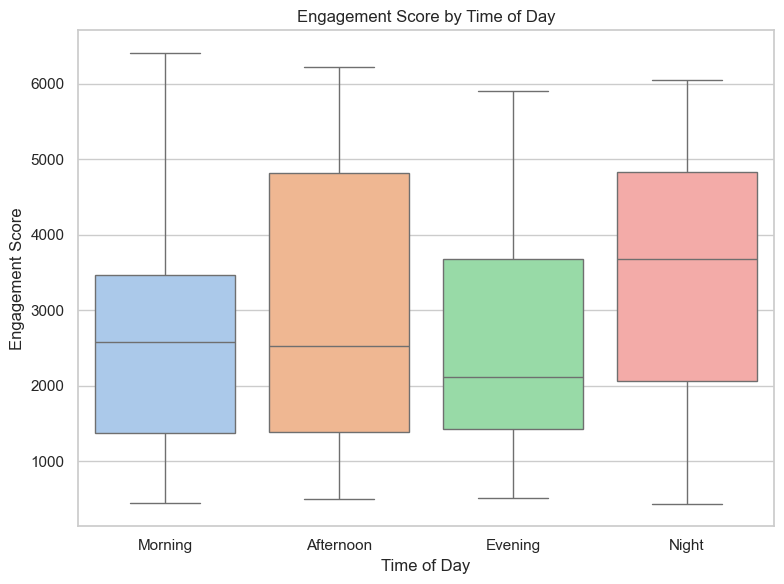

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='time_of_day', y='engagement_score',
            order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='pastel')
plt.title('Engagement Score by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Engagement Score')
plt.tight_layout()
plt.show()


C:\Users\rajlo\AppData\Local\Temp\ipykernel_19452\3661248081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sentiment_score', y='engagement_score', palette='coolwarm')


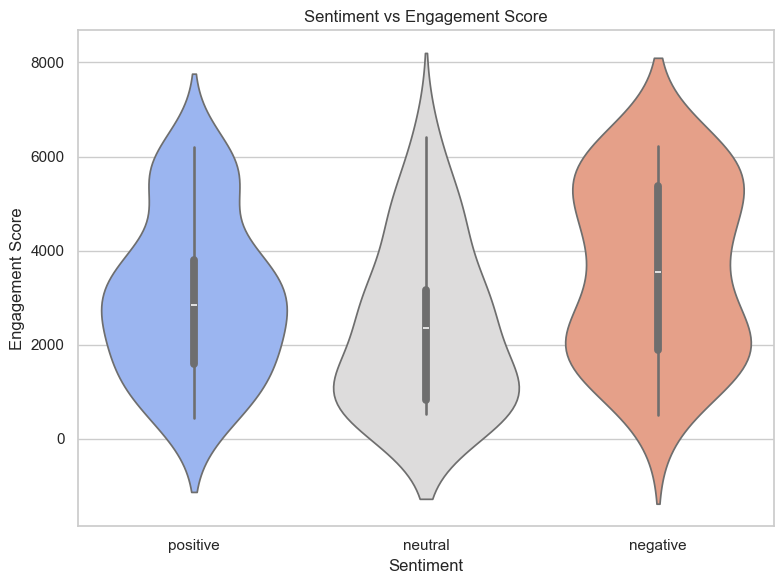

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sentiment_score', y='engagement_score', palette='coolwarm')
plt.title('Sentiment vs Engagement Score')
plt.xlabel('Sentiment')
plt.ylabel('Engagement Score')
plt.tight_layout()
plt.show()


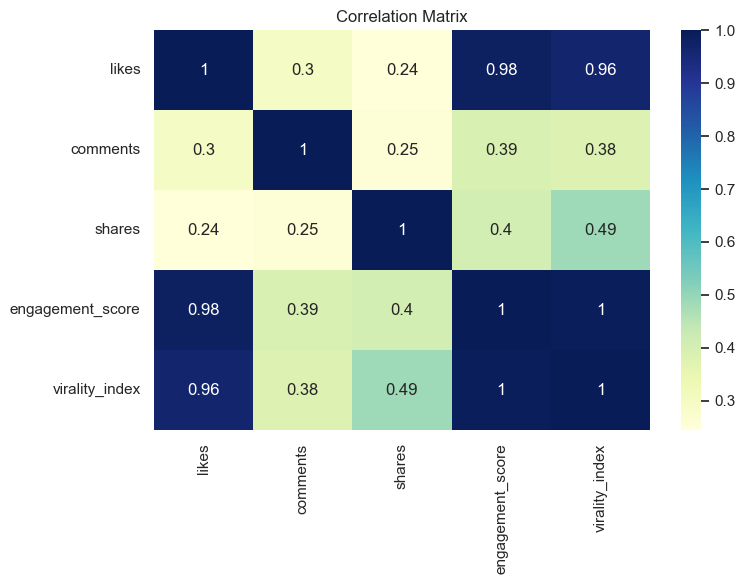

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['likes', 'comments', 'shares', 'engagement_score', 'virality_index']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [15]:
# Select final columns
cleaned_df = df[[
    'platform', 'post_type', 'post_time', 'post_day', 'hour', 'time_of_day',
    'sentiment_score', 'likes', 'comments', 'shares', 'engagement_score', 'virality_index'
]]

# Export to CSV
cleaned_df.to_csv("cleaned_social_media_data.csv", index=False)

print("✅ Cleaned data saved as 'cleaned_social_media_data.csv'")


✅ Cleaned data saved as 'cleaned_social_media_data.csv'
